# Training and Assessing Tree-based Models with Scikit-Learn

__COMP3411 week 2 Tutorial__

- Developers: Maryam Hashemi and Gustavo Batista
- School of Computer Science and Engineering, UNSW Sydney
- Last Update 27th August 2025

In [1]:
######################## 1 ##################################

# NumPy and matplotlib libraries for numerical computation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for dataset
from sklearn.datasets import load_iris

In [2]:
######################## 1 ##################################

# Load the Iris dataset
iris = load_iris()

# To do
# Convert it into a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df["target"]= iris.target
# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


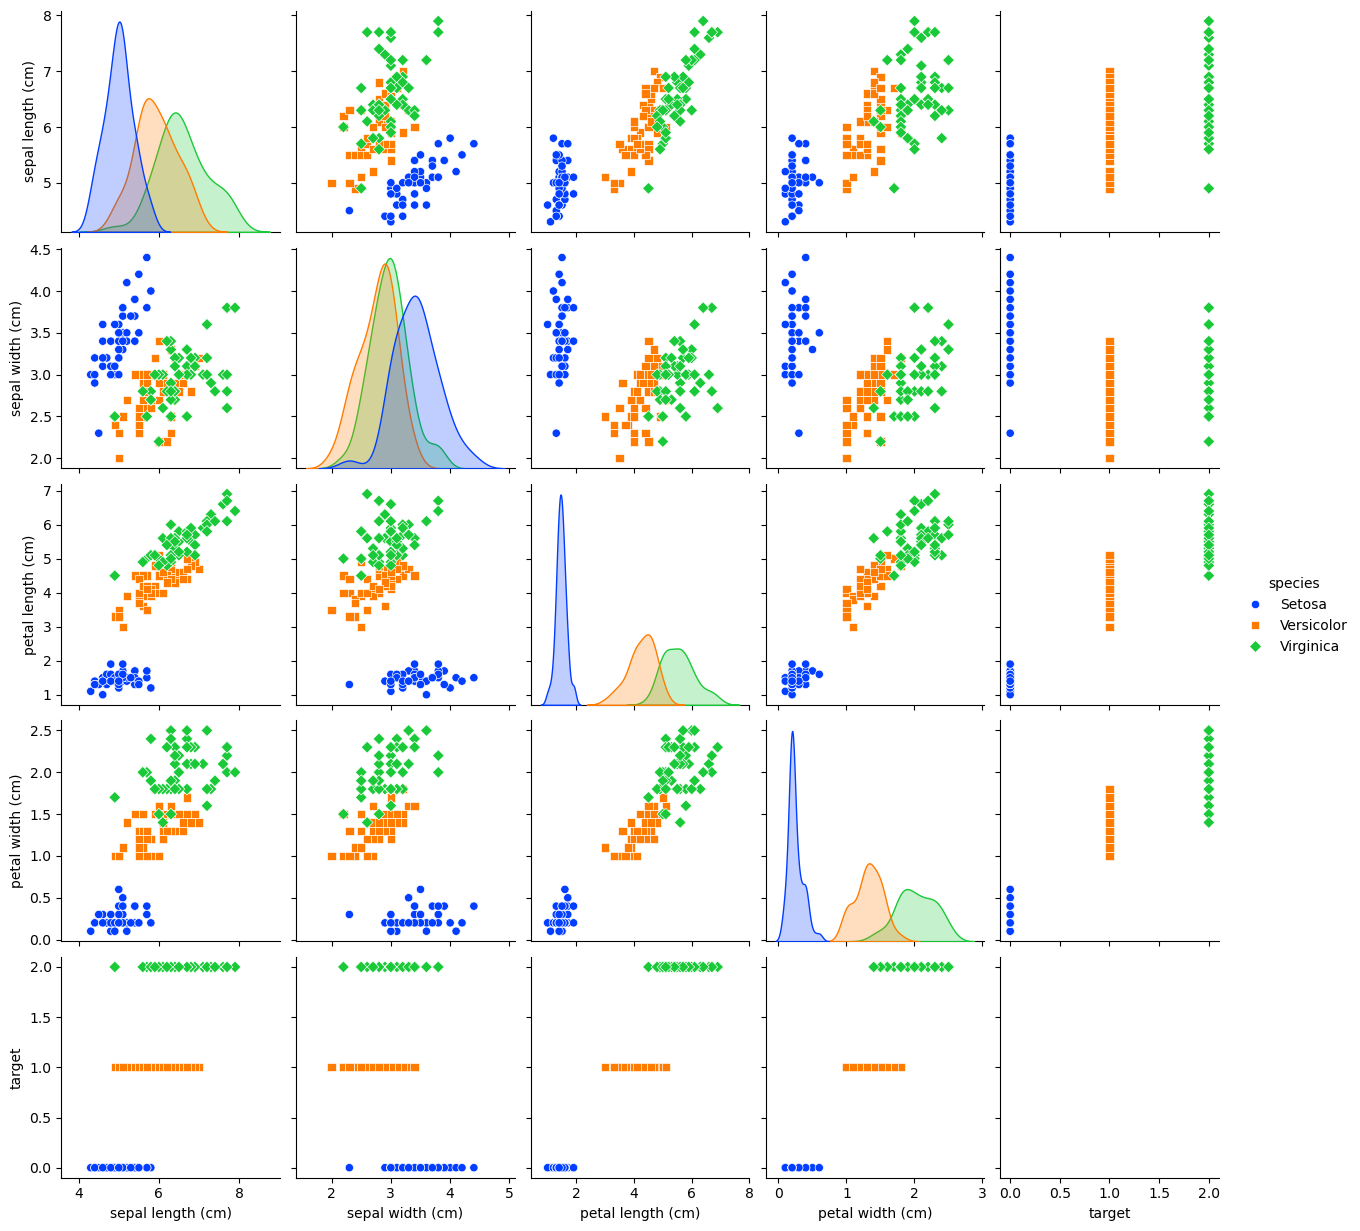

In [3]:
######################## 1 ##################################

# Map target integers to class names for better visualization
iris_df['species'] = iris_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

#To do
# Create a scatter plot matrix
sns.pairplot(iris_df,hue="species",diag_kind="kde",palette="bright",markers=["o","s","D"])

# Display the plot
plt.show()

In [4]:
######################## 1.1 ##################################

def compute_entropy(p):
    """
    Compute the entropy of a probability distribution.


    Parameters:
    - p (numpy.ndarray): 1D array of class probabilities (must sum to 1).

    Returns:
    - float: The entropy value.
    """
    # To Do
    return -np.sum(p*np.log2(p + 1e-15)) # add small value to avoid log(0)

# Test cases
print(compute_entropy(np.array([0.5, 0.5])))   
print(compute_entropy(np.array([0, 1])))       
print(compute_entropy(np.array([1, 0]))) 
print(compute_entropy(np.array([0.3, 0.7])))     

0.9999999999999971
-1.601713251907458e-15
-1.601713251907458e-15
0.8812908992306898


In [5]:
######################## 1.2 ##################################

def compute_class_distribution(labels):
    """
    Compute the proportion of each class in the given labels.

    Parameters:
    - labels (numpy.ndarray): 1D array of class labels.

    Returns:
    - numpy.ndarray: 1D array of class proportions.
    """
    # To Do
    total = len(labels)
    return np.array([np.sum(labels == i) / total for i in np.unique(labels)])


# Test cases
print(compute_class_distribution(np.array([0, 0, 0, 1, 1, 1])))              
print(compute_class_distribution(np.array([0, 0, 0, 0, 0, 1])))              
print(compute_class_distribution(np.array(['a', 'a', 'b', 'b', 'c', 'c'])))      

[0.5 0.5]
[0.83333333 0.16666667]
[0.33333333 0.33333333 0.33333333]


=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       1.00      1.00      1.00        40
   Virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


=== Test Performance ===
Accuracy: 0.9333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93 

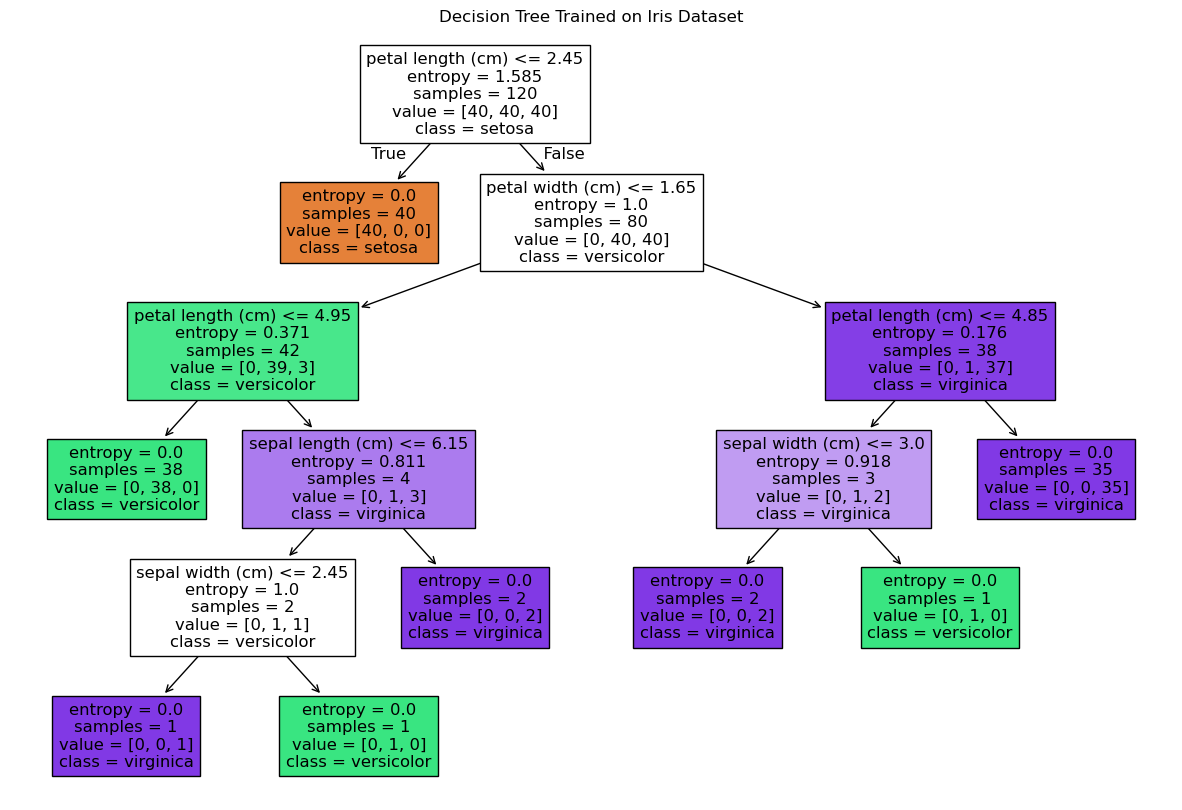

In [6]:
######################## 2 ##################################
# Scikit-learn libraries for models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Divide the DataFrame into attributes (features) and class labels
X = iris_df.iloc[:, :-2]  # All columns except the last one (features)
y = iris_df.iloc[:, -1]   # The last column (class labels)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=list(iris.target_names), filled=True)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

In [11]:
######################## 3.1 Bagged Trees ##################################
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Divide the DataFrame into attributes (features) and class labels
X = iris_df.iloc[:, :-2]  # All columns except the last one (features)
y = iris_df.iloc[:, -1]   # The last column (class labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the base estimator (decision tree)
base_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Initialize Bagging Classifier
bagged_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,
    random_state=42,
)

# Train the bagged classifier
bagged_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = bagged_clf.predict(X_train)
y_test_pred = bagged_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       1.00      1.00      1.00        40
   Virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


=== Test Performance ===
Accuracy: 0.9667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97 

In [12]:
######################## 3.2 Random Forests ##################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Divide the DataFrame into attributes (features) and class labels
X = iris_df.iloc[:, :-2]  # All columns except the last one (features)
y = iris_df.iloc[:, -1]   # The last column (class labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    random_state=42,
)

# Train the random forest
rf_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))



=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       1.00      1.00      1.00        40
   Virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


=== Test Performance ===
Accuracy: 0.9333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93 

In [14]:
######################## 3.3 AdaBoost ##################################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Divide the DataFrame into attributes (features) and class labels
X = iris_df.iloc[:, :-2]
y = iris_df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base estimator: shallow decision tree
base_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=42)

# Initialize AdaBoost classifier
boosted_clf = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=50,
    random_state=42
)

# Train AdaBoost
boosted_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = boosted_clf.predict(X_train)
y_test_pred = boosted_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       1.00      1.00      1.00        40
   Virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


=== Test Performance ===
Accuracy: 0.9000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.82      0.90      0.86        10
   Virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90 